In [1]:
%load_ext itikz
import itikz
from itikz import nicematrix as nM

import sympy as sym

In [2]:
two           = sym.sympify(2)
one           = sym.sympify(1)

n             = sym.symbols("n")
t             = sym.symbols("t")
u_0, v_0, w_0 = sym.symbols("u_0, v_0, w_0")
y_0           = sym.Matrix([[u_0,v_0,w_0]]).T

<div style="float:center;width:100%;text-align:center;">
<strong style="height:100px;color:darkred;font-size:40px;">Eigendecompositions and Functions of a Matrix</strong><br>
<!--<div style="float:center;width:100%;text-align:center;">
    <strong style="height:100px;color:darkred;font-size:30px;">Diagonalization</strong>
</div>-->
</div>

Consider the eigendecomposition of a diagonalizable matrix: $A = S \Lambda S^{-1}.$

We can compute powers of a matrix by observing that<br>
$\qquad
\begin{align}
A^n &= A \ A \ A \ \dots \ A \\
    &= S \Lambda S^{-1} \ S \Lambda S^{-1} \ S \Lambda S^{-1} \  \dots S \Lambda S^{-1} \\
    &= S \Lambda \ \Lambda \  \Lambda \ \dots  \Lambda \ S^{-1} \\
    &= S \Lambda^n S^{-1}
\end{align}
$

The matrix $\Lambda^n$ is easy to compute:<br>
$\qquad
\begin{pmatrix} \lambda_1 & 0 & 0 & \cdots & 0 \\
                0 & \lambda_2 & 0 & \cdots & 0 \\
                0 & 0 & \lambda_2 & \cdots & 0 \\
                0 & 0 & 0 & \cdots & \lambda_k \end{pmatrix}^{\color{red}{n}} =
\begin{pmatrix} \lambda_1^{\color{red}{n}} & 0 & 0 & \cdots & 0 \\
                0 & \lambda_2^{\color{red}{n}} & 0 & \cdots & 0 \\
                0 & 0 & \lambda_3^{\color{red}{n}} & \cdots & 0 \\
                0 & 0 & 0 & \cdots & \lambda_k^{\color{red}{n}} \end{pmatrix}
$

A simple computation shows that we can extend this result to arbitrary non-negative powers.<br>
Furthermore, if $A$ is invertible, we can extend this result to negative exponents as well.

<div style="background-color:#F2F5A9;color:black;">

**Theorem:** Let $A$ be a diagonalizable matrix with eigendecomposition $A = S \Lambda S^{-1}.$<br>

$\quad\;$ Then $A^p = \left\{ \begin{align}
S \Lambda^p S^{-1} \quad \text{for all } p \ge 0 & \;\; \text{ for any matrix } A \\
S \Lambda^p S^{-1} \quad \text{for all } p < 0   & \;\; \text{ for any invertible matrix } A
\end{align} \right.$
<div>

___
Consider the following example of a $3 \times 3$ matrix with a single non-zero eigenvalue:


> Consider $A = \left(\begin{array}{rrr} 2 & 1 & 0 \\ 0 & 1 & 0 \\ -1 & -1 & 1 \end{array}\right)$ $\quad$ with eigenvalues $\lambda=2,1,1$

# 1 Eigendecomposition

In [3]:
A =sym.Matrix( [[  2 , 1 , 0],
                [  0,  1,  0],
                [ -1, -1,  1]])

A.charpoly()

PurePoly(lambda**3 - 4*lambda**2 + 5*lambda - 2, lambda, domain='ZZ')

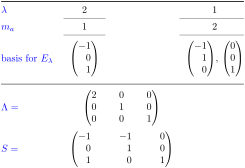

In [4]:
nM.show_eig_tbl(A)

Functions of the matrix $A$ are easier to handle if we expand the eigendecomposition in the form $A = \sum_{i=1}^N \lambda_i v_i u_i^t$,<br>
$\qquad$ where the vectors $v_i$ are the columns of $S$ and the vectors $u_i^t$ are the rows of $S^{-1}$

$\qquad$ For this matrix, there is only one term since two of the $\lambda$ values are zero.

# 2. Powers of $A$

## 2.1 Integer Power of $A$

In [5]:
S=sym.Matrix([[-1,-1,0],[0,1,0], [1,0,1]])/2
Sinv = S.inv()
print("The inverse of S is given by")
Sinv

The inverse of S is given by


Matrix([
[-2, -2, 0],
[ 0,  2, 0],
[ 2,  2, 2]])

In [6]:
print("The projection matrix into the eigenspace for lambda = 2 is given by")
u_vt_2 = S[:,0]*Sinv[0,:]
u_vt_2

The projection matrix into the eigenspace for lambda = 2 is given by


Matrix([
[ 1,  1, 0],
[ 0,  0, 0],
[-1, -1, 0]])

In [7]:
print("The projection matrix into the eigenspace for lambda = 1 is given by")
u_vt_1 = S[:,1]*Sinv[1,:] + S[:,2]*Sinv[2,:]
u_vt_1

The projection matrix into the eigenspace for lambda = 1 is given by


Matrix([
[0, -1, 0],
[0,  1, 0],
[1,  1, 1]])

In [8]:
A_n = two**n * u_vt_2 + one**n * u_vt_1
A_n

Matrix([
[    2**n, 2**n - 1, 0],
[       0,        1, 0],
[1 - 2**n, 1 - 2**n, 1]])

In [9]:
A_n.subs( n, 0)

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

## 2.2 Non-negative Power of $A$

Note we cannot use negative numbers for $n$ (division by zero), but we can extend this function to powers other than integers.

E.g.,

In [10]:
sqrt_A = A_n.subs(n,1/two)
sqrt_A

Matrix([
[    sqrt(2), -1 + sqrt(2), 0],
[          0,            1, 0],
[1 - sqrt(2),  1 - sqrt(2), 1]])

In [11]:
print("check sqrtA**2 == A")
sqrt_A*sqrt_A - A

check sqrtA**2 == A


Matrix([
[                                   0,         -2 + sqrt(2)*(-1 + sqrt(2)) + sqrt(2), 0],
[                                   0,                                             0, 0],
[-sqrt(2) + sqrt(2)*(1 - sqrt(2)) + 2, -2*sqrt(2) + (-1 + sqrt(2))*(1 - sqrt(2)) + 3, 0]])

# 3. Functions of $A$

We can extend this to functions of $A$, e.g., using power series (subject to convergence considerations)

In [12]:
def apply_to_A( func ):
    return func(two)*u_vt_2 + func(one)*u_vt_1

In [13]:
apply_to_A( lambda x: sym.sin(sym.pi/27 * x))

Matrix([
[              sin(2*pi/27), -sin(pi/27) + sin(2*pi/27),          0],
[                         0,                 sin(pi/27),          0],
[-sin(2*pi/27) + sin(pi/27), -sin(2*pi/27) + sin(pi/27), sin(pi/27)]])

# 4. Application: Difference Equations

Consider the following system of Difference Equations for three values $u_n, v_n$ and $w_n$ for $n=1,2, \dots:

$\quad \left. \begin{align} u_n =&\ 2 u_{n-1} + v_{n-1} \\ v_{n}=&\  v_{n-1}  \\ w_{n} =&\ - u_{n-1} - v_{n-1} + w_{n-1} \end{align}\right\}\quad$
with initial condition
$\quad\left\{ \begin{align} u_0 =&\ 3 \\ v_0 =&\ 2 \\ w_0 =&\ 4 \end{align}\right.$

We can convert this system to matrix form by defining a vector $\quad$
$y_n= \begin{pmatrix} u_n \\ v_n \\ w_n \end{pmatrix}$
$\quad$ resulting in the system $\mathbf{y_n = A y_{n-1}}$ with initial condition $\mathbf{y_0 = \begin{pmatrix} 3\\ 2 \\ 4 \end{pmatrix}},$<br>
$\quad$ where $A$ is the matrix we have been analysing.

The solution is given by $y_n = A^n y_0$

In [14]:
y             = apply_to_A(lambda x: x**n ) * y_0

print( "The general solution of y_n = A y_{n-1} is given by")
y

The general solution of y_n = A y_{n-1} is given by


Matrix([
[            2**n*u_0 + v_0*(2**n - 1)],
[                                  v_0],
[u_0*(1 - 2**n) + v_0*(1 - 2**n) + w_0]])

In [15]:
print("Substituting the initial condition, we obtain the solution")
y.subs(u_0,3).subs(v_0, 2).subs(w_0, 4)

Substituting the initial condition, we obtain the solution


Matrix([
[5*2**n - 2],
[         2],
[9 - 5*2**n]])

# 5. Application: Linear System of ODEs

Consider the foolowing system of ODEs for three functions $u(t), v(t)$ and $w(t)$:

$\quad \left. \begin{align} u' =&\ 2 u + v\\ v'=&\  v \\ w' =&\ - u - v + w \end{align}\right\}\quad$
with initial condition
$\quad\left\{ \begin{align} u(0) =&\ 3 \\ v(0) =&\ 2 \\ w(0) =&\ 4 \end{align}\right.$

We can convert this system to matrix form by defining a vector function$\quad$
$y(t) = \begin{pmatrix} u(t) \\ v(t) \\ w(t) \end{pmatrix}$
$\quad$ resulting in the system $\mathbf{y' = A y}$ with initial condition $\mathbf{y(0) = \begin{pmatrix} 3\\ 2 \\ 4 \end{pmatrix}},$<br>
$\quad$ where $A$ is the matrix we have been analysing.

The change of coordinates $y = S \tilde{y}$ decouples the equations:
$\quad y' = A y \Leftrightarrow  \tilde{y}' = S^{-1} A S \tilde{y} = \Lambda \tilde{y}$.

Solving for each of the functions in $\tilde{y}$ we obtain $\tilde{y} = e^{\Lambda t}$.

Finally, changing back to the original coordinate system and applying the inital condition, we obtain the solution $\mathbf{y(t) = e^{A t} y(0)}$

In [16]:
y             = apply_to_A(lambda x: sym.exp(A*t)) * y_0

print("The general solution of y'= A y is given by y =")
y

The general solution of y'= A y is given by y =


Matrix([
[                          u_0*exp(2*t) + v_0*(exp(2*t) - exp(t))],
[                                                      v_0*exp(t)],
[u_0*(-exp(2*t) + exp(t)) + v_0*(-exp(2*t) + exp(t)) + w_0*exp(t)]])

In [17]:
print("Substituting the initial condition, we obtain the solution")
y.subs(u_0,3).subs(v_0, 2).subs(w_0, 4)

Substituting the initial condition, we obtain the solution


Matrix([
[ 5*exp(2*t) - 2*exp(t)],
[              2*exp(t)],
[-5*exp(2*t) + 9*exp(t)]])